In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
switch_seconds = range(6, 46, 1)

waiting_time_per_switch = [42.615090132323786, 28.708860580137706, 21.984149338129786, 19.56340896189385, 18.953035808619237, 18.699746526186722, 18.481870201911146, 18.61447451571057, 18.691040348230537, 19.126579000333106, 19.263574843595176, 19.408574998015805, 19.65381517193733, 20.180397182540922, 20.360425594182317, 20.401709200194997, 20.475254779572307, 21.02860878111119, 21.17548448135151, 21.40539801140862, 21.71647049168515, 22.097936651246027, 21.699770541648558, 22.039444704188604, 22.367877282951145, 23.138988537841886, 23.39561243386275, 23.430128654101264, 23.25138462098, 23.564994268401477, 24.144894235103123, 24.483032559617318, 25.2248434705193, 25.018017717023216, 25.489806690317106, 25.845597128291516, 25.273484305807465, 24.766733713835407, 25.544736752252483, 26.043435229062712]

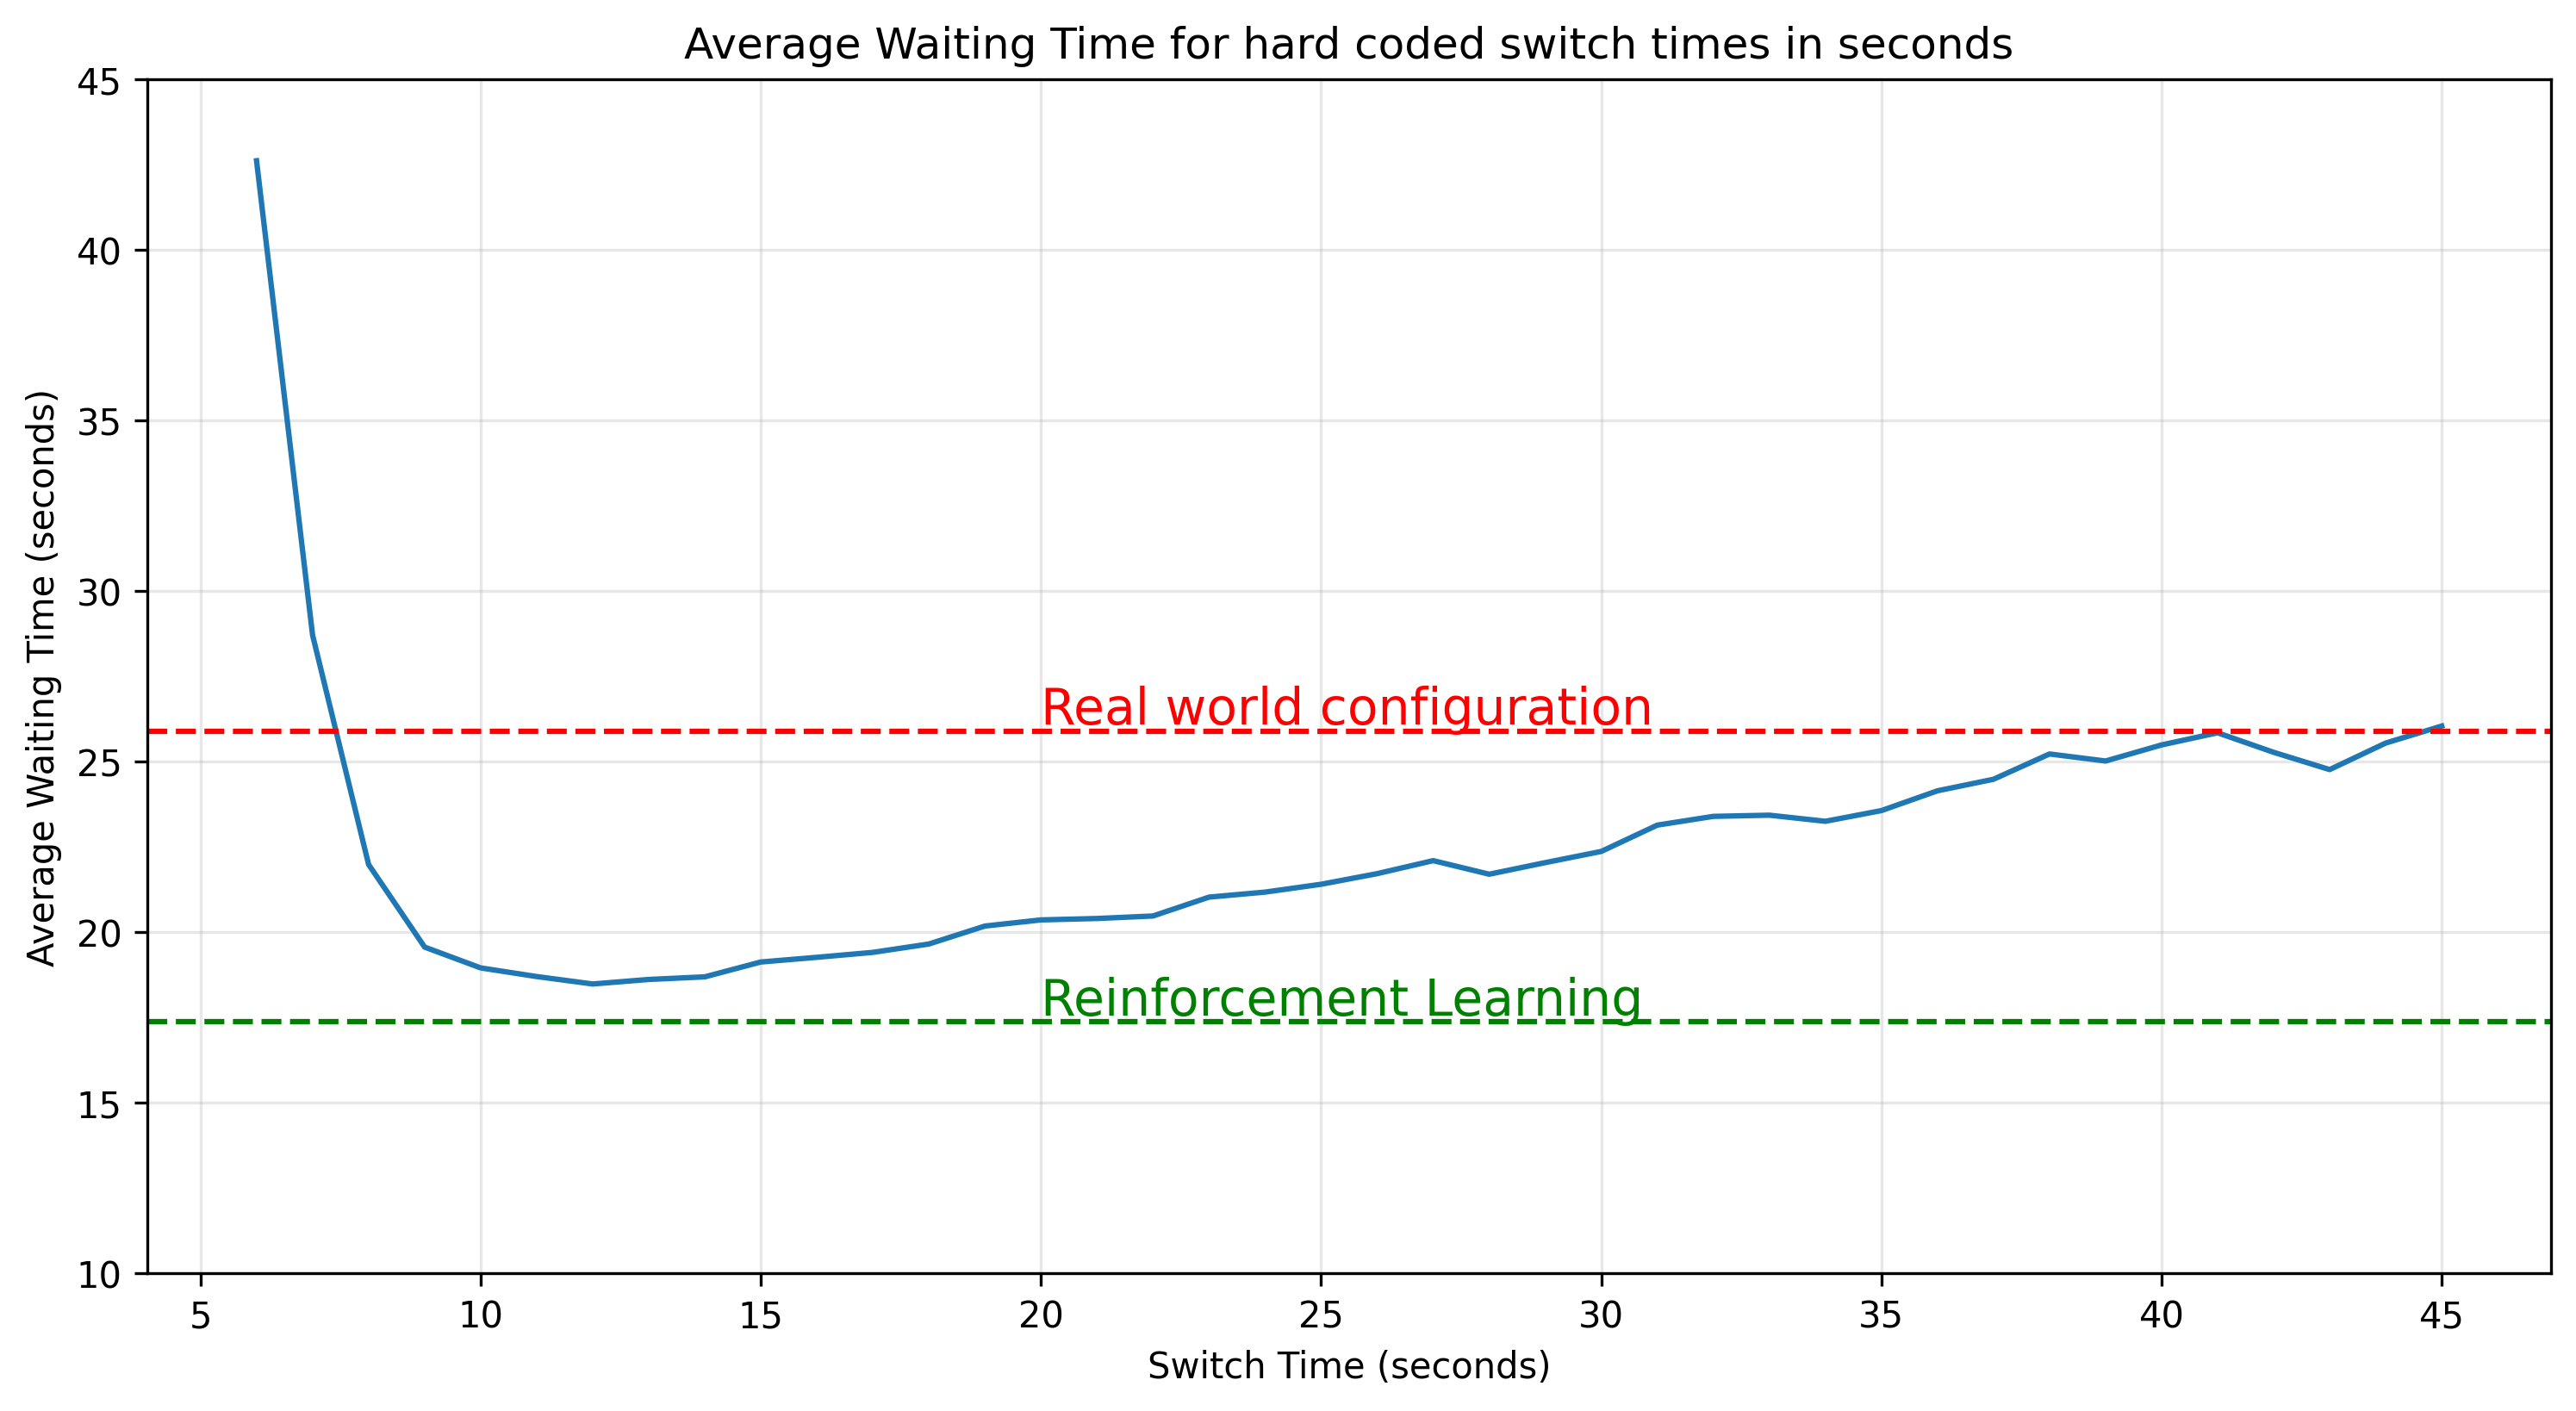

In [22]:
# high resolution plot
plt.figure(figsize=(12, 6), dpi=300)

# plot the results
plt.plot(switch_seconds, waiting_time_per_switch)

# dashed line at 25.88
plt.axhline(y=25.88, color='r', linestyle='--')
# label at 25.88
plt.text(20, 26.1, 'Real world configuration', fontsize=14, color='r')

# dashed line at 17.38
plt.axhline(y=17.38, color='g', linestyle='--')
# label at 17.38
plt.text(20, 17.58, 'Reinforcement Learning', fontsize=14, color='g')

plt.xlabel('Switch Time (seconds)')
plt.ylabel('Average Waiting Time (seconds)')

plt.ylim(10, 45)
# show grid light
plt.grid(True, alpha=0.3)
plt.title('Average Waiting Time for hard coded switch times in seconds')
plt.show()

In [23]:
print(f'Optimal switch time: {switch_seconds[np.argmin(waiting_time_per_switch)]} seconds')

Optimal switch time: 12 seconds


In [25]:
print(f'Average waiting time: {min(waiting_time_per_switch)} seconds')

Average waiting time: 18.481870201911146 seconds
